# Car Accidents Iowa

In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [353]:
df= pd.read_csv('DataCleaningOutput.csv', index_col = 0)

In [354]:
df.columns

Index(['DOT Case Number', 'Law Enforcement Case Number', 'Crash Date & Time',
       'District', 'County', 'City', 'Crash Month', 'Crash Day', 'Crash Time',
       'Major Cause', 'Crash Manner', 'Crash Severity', 'Surface Conditions',
       'Drug/Alcohol Related', 'Environment', 'Roadway', 'Light Conditions',
       'Weather Conditions', 'Work Zone', 'Paved Road', 'Roadway Junction',
       'First Harmful Event', 'Harmful Event Location', 'Literal Description',
       'Vehicles', 'Occupants', 'Fatalities', 'Injuries', 'Major Injuries',
       'Minor Injuries', 'Possible Injuries', 'Unknown Injuries',
       'Property Damage', 'Report Type', 'Rest Update', 'Crash Location'],
      dtype='object')

In [355]:
len(df)

557185

Since we are focusing on Car Accidents that do result in injury, dropping all accidents with 'Property Damage Only'

In [356]:
property_damage_only = df.index[df['Crash Severity'] == 'Property Damage Only'].tolist()
df.drop(property_damage_only, inplace=True)
print(df.shape)

(154625, 36)


With new clarification from DOT Iowa, ranking Crash Severity accordingly: 1 - Possible Injuries, 2 - Minor Injuries, 3 - Major Injuries, 4 - Fatal

In [357]:
df['Crash Severity'] = df['Crash Severity'].replace('Possible/Unknown', 1).replace('Minor Injury', 2).replace('Major Injury', 3).replace('Fatal', 4)

([<matplotlib.axis.XTick at 0x20a4aa3d0>,
 <a list of 4 Text major ticklabel objects>)

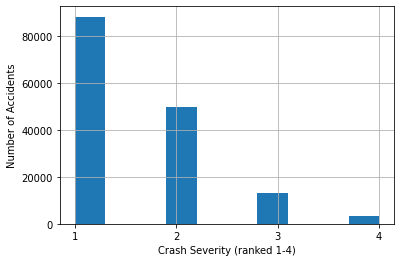

In [358]:
from pylab import hist, show, xticks
df['Crash Severity'].hist()
plt.xlabel('Crash Severity (ranked 1-4)')
plt.ylabel('Number of Accidents')
xticks(range(1, 5))

In [359]:
df['Crash Severity'].describe()

count    154625.000000
mean          1.558538
std           0.739652
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: Crash Severity, dtype: float64

Here's a histogram that shows the same thing.

([<matplotlib.axis.XTick at 0x20a16bb90>,
 <a list of 4 Text major ticklabel objects>)

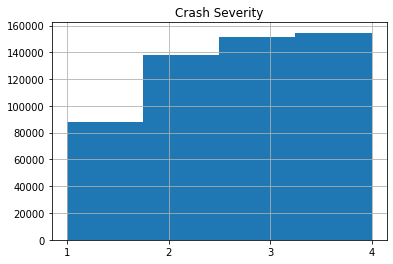

In [360]:
df.hist('Crash Severity', bins=4, cumulative=1)
xticks(range(1, 5))

Very few fatal accidents

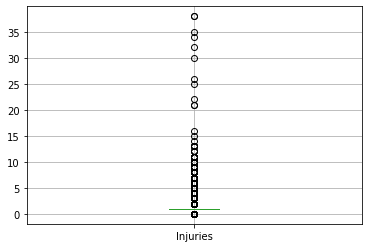

In [361]:
df[['Injuries']].boxplot()

Many outliers, injury count not correlated with accident severity

In [362]:
df['Injuries'].describe()

count    154625.000000
mean          1.322309
std           0.780923
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          38.000000
Name: Injuries, dtype: float64

Boxplot shows many injuries, vast majority involve a single injury

Is Under the influence driving also higher on Fridays?

First grouping alcohol-levels into fewer categories

In [363]:
df['Drug/Alcohol Related'].value_counts()

None Indicated                                  141353
Alcohol (Statutory)                               7303
Refused                                           2289
Under Influence of Alcohol/Drugs/Medications      2037
Alcohol (< Statutory)                              878
Drug                                               530
Drug/Alcohol (Statutory)                           194
Drug/Alcohol (< Statutory)                          41
Name: Drug/Alcohol Related, dtype: int64

In [364]:
df['Drug/Alcohol Related'].replace(['Alcohol (Statutory)', 'Drug', 'Drug/Alcohol (Statutory)', 'Under Influence of Alcohol/Drugs/Medications'], 'Significant Alcohol/Drug Present', inplace=True)

In [365]:
df['Drug/Alcohol Related'].replace(['Alcohol (< Statutory)', 'Drug/Alcohol (< Statutory)'], 'Trace Alcohol/Drug Present', inplace=True )

In [366]:
df['Drug/Alcohol Related'].value_counts()

None Indicated                      141353
Significant Alcohol/Drug Present     10064
Refused                               2289
Trace Alcohol/Drug Present             919
Name: Drug/Alcohol Related, dtype: int64

Does Under the influence result in more serious car crash injuries ?

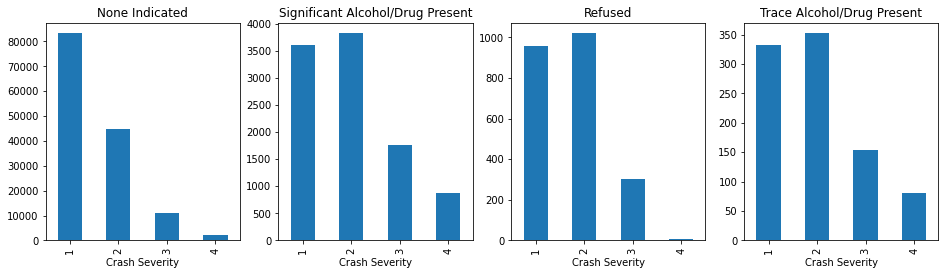

In [367]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(16, 4))
fig.subplots_adjust(hspace=0.8)

for i in np.unique(df['Drug/Alcohol Related']):
    df[df['Drug/Alcohol Related']=='None Indicated'].groupby('Crash Severity').size().plot.bar(ax=axes[0], title = 'None Indicated')
    df[df['Drug/Alcohol Related']=='Significant Alcohol/Drug Present'].groupby('Crash Severity').size().plot.bar(ax=axes[1], title = 'Significant Alcohol/Drug Present')
    df[df['Drug/Alcohol Related']=='Refused'].groupby('Crash Severity').size().plot.bar(ax=axes[2], title = 'Refused')
    df[df['Drug/Alcohol Related']=='Trace Alcohol/Drug Present'].groupby('Crash Severity').size().plot.bar(ax=axes[3], title = 'Trace Alcohol/Drug Present')

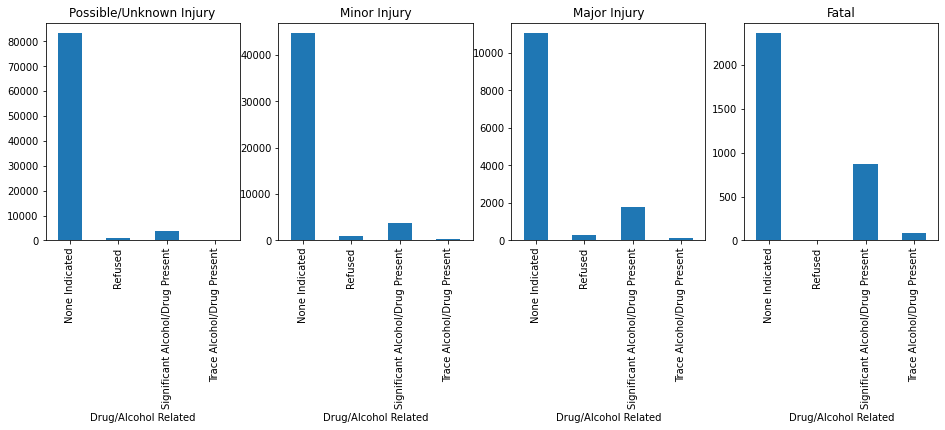

In [368]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(16, 4))
fig.subplots_adjust(hspace=0.8)

for i in np.unique(df['Crash Severity']):
    df[df['Crash Severity']==1].groupby('Drug/Alcohol Related').size().plot.bar(ax=axes[0], title = 'Possible/Unknown Injury')
    df[df['Crash Severity']==2].groupby('Drug/Alcohol Related').size().plot.bar(ax=axes[1], title = 'Minor Injury')
    df[df['Crash Severity']==3].groupby('Drug/Alcohol Related').size().plot.bar(ax=axes[2], title = 'Major Injury')
    df[df['Crash Severity']==4].groupby('Drug/Alcohol Related').size().plot.bar(ax=axes[3], title = 'Fatal')

The axis are drastically different, not sure what is a reasonable conclusion to draw from these plots.

Now let's look at Crash Severity by weekday

In [369]:
dates = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Crash Day'] = pd.Categorical(df['Crash Day'], categories=dates, ordered=True)

Text(0, 0.5, 'Number of Crashes')

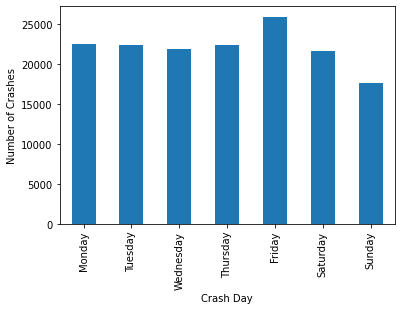

In [370]:
df.groupby(['Crash Day']).size().plot.bar()
plt.ylabel('Number of Crashes')

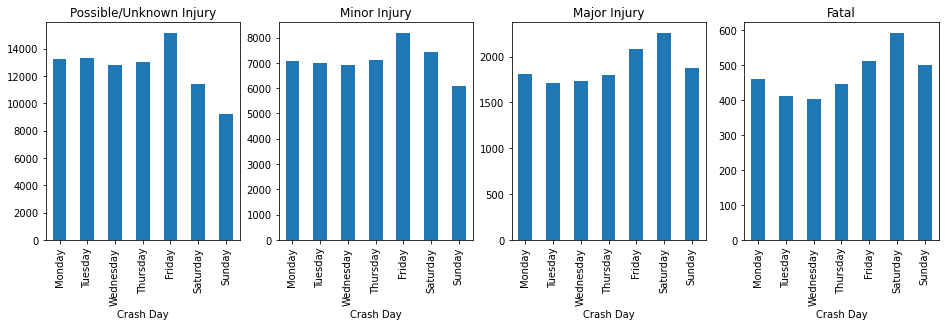

In [371]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(16, 4))
fig.subplots_adjust(hspace=0.8)

for i in np.unique(df['Crash Severity']):
    df[df['Crash Severity']==1].groupby('Crash Day').size().plot.bar(ax=axes[0], title = 'Possible/Unknown Injury')
    df[df['Crash Severity']==2].groupby('Crash Day').size().plot.bar(ax=axes[1], title = 'Minor Injury')
    df[df['Crash Severity']==3].groupby('Crash Day').size().plot.bar(ax=axes[2], title = 'Major Injury')
    df[df['Crash Severity']==4].groupby('Crash Day').size().plot.bar(ax=axes[3], title = 'Fatal')

It seems like there are the most crashes of every severity on Friday and Saturday. Which statistical test to perform to see if this is significant?

Any relationship with under the influence?

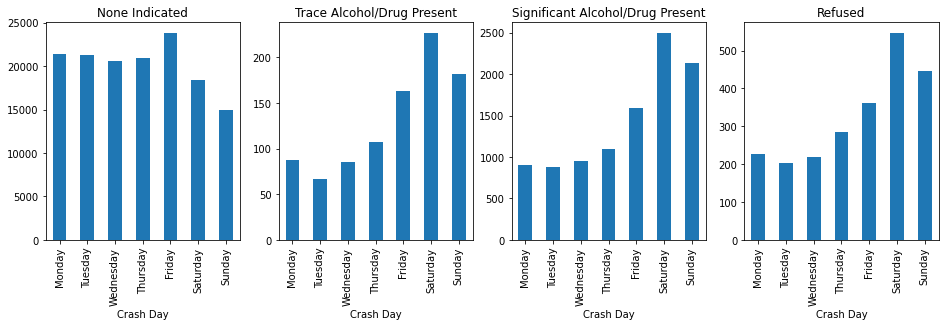

In [372]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(16, 4))
fig.subplots_adjust(hspace=0.8)

for i in np.unique(df['Drug/Alcohol Related']):
    df[df['Drug/Alcohol Related']=='None Indicated'].groupby('Crash Day').size().plot.bar(ax=axes[0], title = 'None Indicated')
    df[df['Drug/Alcohol Related']=='Trace Alcohol/Drug Present'].groupby('Crash Day').size().plot.bar(ax=axes[1], title = 'Trace Alcohol/Drug Present')
    df[df['Drug/Alcohol Related']=='Significant Alcohol/Drug Present'].groupby('Crash Day').size().plot.bar(ax=axes[2], title = 'Significant Alcohol/Drug Present')
    df[df['Drug/Alcohol Related']=='Refused'].groupby('Crash Day').size().plot.bar(ax=axes[3], title = 'Refused')

In [374]:
#Is crash month correlated with traffic volume? - pull another dataset with traffic volume

In [375]:
df['Weather Conditions'].value_counts()

Clear                           87749
Cloudy                          41582
Rain                            10435
Snow                             8072
Fog, smoke, smog                 1339
Sleet, hail                      1315
Blowing sand, soil, dirt         1164
Unknown                          1120
Freezing rain/drizzle             707
Severe Winds                      483
Not Reported                      335
Blowing Snow                      264
Other (explain in narrative)       60
Name: Weather Conditions, dtype: int64

Reducing number of categories by grouping similar weather by characteristics

In [376]:
df['Weather Conditions'].replace(['Unknown', 'Not Reported'], 'Unknown/Not Reported', inplace=True)

In [377]:
df['Weather Conditions'].replace(['Blowing sand, soil, dirt', 'Severe Winds'], 'Blowing debris/Severe Winds', inplace=True)

In [378]:
df['Weather Conditions'].replace(['Sleet, hail', 'Blowing Snow', 'Freezing rain/drizzle'], 'Freezing rain variations', inplace=True)

In [379]:
df['Weather Conditions'].value_counts()

Clear                           87749
Cloudy                          41582
Rain                            10435
Snow                             8072
Freezing rain variations         2286
Blowing debris/Severe Winds      1647
Unknown/Not Reported             1455
Fog, smoke, smog                 1339
Other (explain in narrative)       60
Name: Weather Conditions, dtype: int64

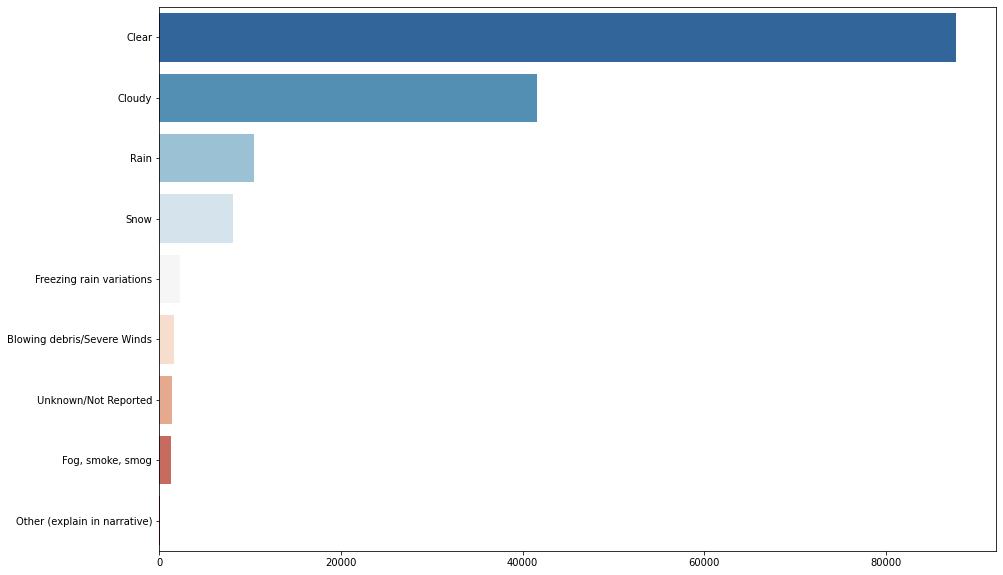

In [380]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['Weather Conditions'].value_counts())
names = list(x.index)
values = list(x['Weather Conditions'])
sns.barplot(x=values, y=names, palette="RdBu_r")

In [382]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Crash Month'] = pd.Categorical(df['Crash Month'], categories=months, ordered=True)

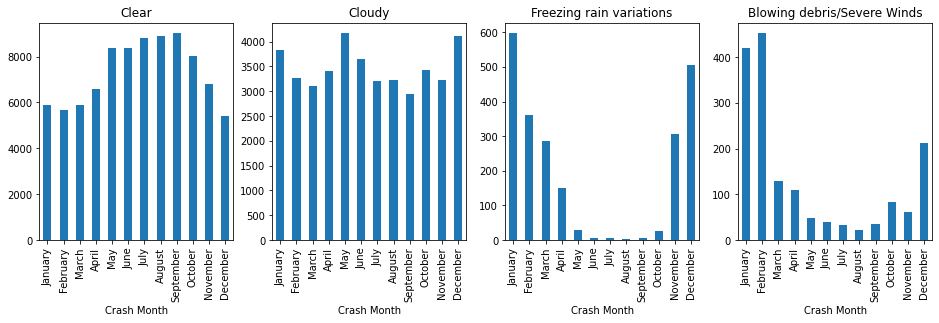

In [386]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(16, 4))
fig.subplots_adjust(hspace=0.8)

for i in np.unique(df['Weather Conditions']):
    df[df['Weather Conditions']=='Clear'].groupby('Crash Month').size().plot.bar(ax=axes[0], title = 'Clear')
    df[df['Weather Conditions']=='Cloudy'].groupby('Crash Month').size().plot.bar(ax=axes[1], title = 'Cloudy')
    df[df['Weather Conditions']=='Freezing rain variations'].groupby('Crash Month').size().plot.bar(ax=axes[2], title = 'Freezing rain variations')
    df[df['Weather Conditions']=='Blowing debris/Severe Winds'].groupby('Crash Month').size().plot.bar(ax=axes[3], title = 'Blowing debris/Severe Winds')

This makes sense, as there's more clear days in the summer and more bad weather in the winter.

Want too look at Crash Time... bin crash time per hour?

Plot car accidents over time (course of 10 years)

In [388]:
df.dtypes

DOT Case Number                   int64
Law Enforcement Case Number      object
Crash Date & Time                object
District                          int64
County                           object
City                             object
Crash Month                    category
Crash Day                      category
Crash Time                       object
Major Cause                      object
Crash Manner                     object
Crash Severity                    int64
Surface Conditions               object
Drug/Alcohol Related             object
Environment                      object
Roadway                          object
Light Conditions                 object
Weather Conditions               object
Work Zone                         int64
Paved Road                       object
Roadway Junction                 object
First Harmful Event              object
Harmful Event Location           object
Literal Description              object
Vehicles                          int64


In [389]:
df['Crash Date']= pd.to_datetime(df['Crash Date & Time'])  

In [391]:
df.dtypes

DOT Case Number                         int64
Law Enforcement Case Number            object
Crash Date & Time                      object
District                                int64
County                                 object
City                                   object
Crash Month                          category
Crash Day                            category
Crash Time                             object
Major Cause                            object
Crash Manner                           object
Crash Severity                          int64
Surface Conditions                     object
Drug/Alcohol Related                   object
Environment                            object
Roadway                                object
Light Conditions                       object
Weather Conditions                     object
Work Zone                               int64
Paved Road                             object
Roadway Junction                       object
First Harmful Event               

In [393]:
plt.plot_date(df['Crash Time'], df['Crash Time'])

ValueError: x and y must have same first dimension, but have shapes (154625,) and (1,)

ValueError: Image size of 4414511x248 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>